In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import heat_demand as hd
import cop

In [3]:
LA = 'Moray'
weather_year = 2010
future_year = 2050
FES_year = '2022'
FES_scenario = 'LW'

<AxesSubplot: >

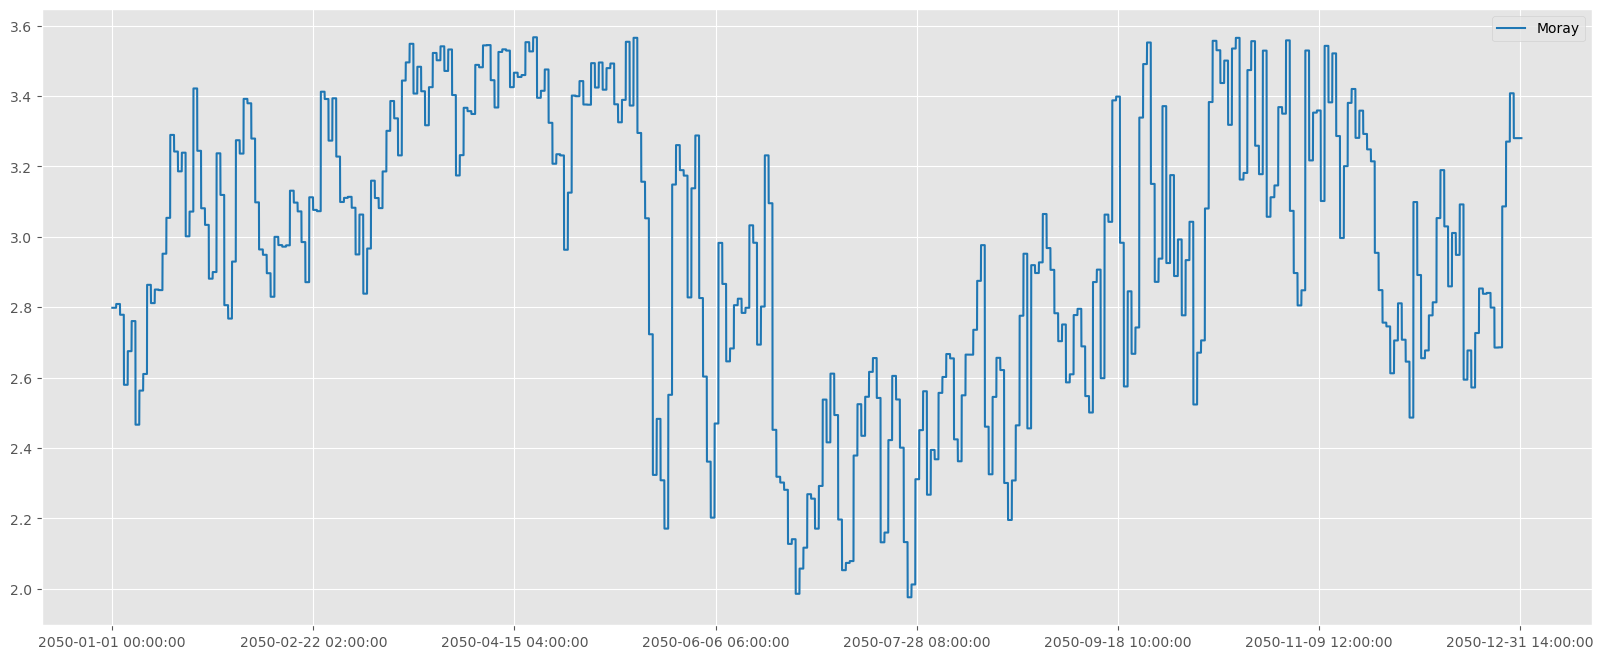

In [4]:
df_ASHP = cop.day_cop_for_year_LA('ASHP', 'very good', future_year=future_year, weather_year=weather_year)
df_ASHP_LA = df_ASHP[[LA]]

plt.style.use('ggplot')
df_ASHP_LA.plot(figsize=(20,8), cmap='tab20')

<AxesSubplot: >

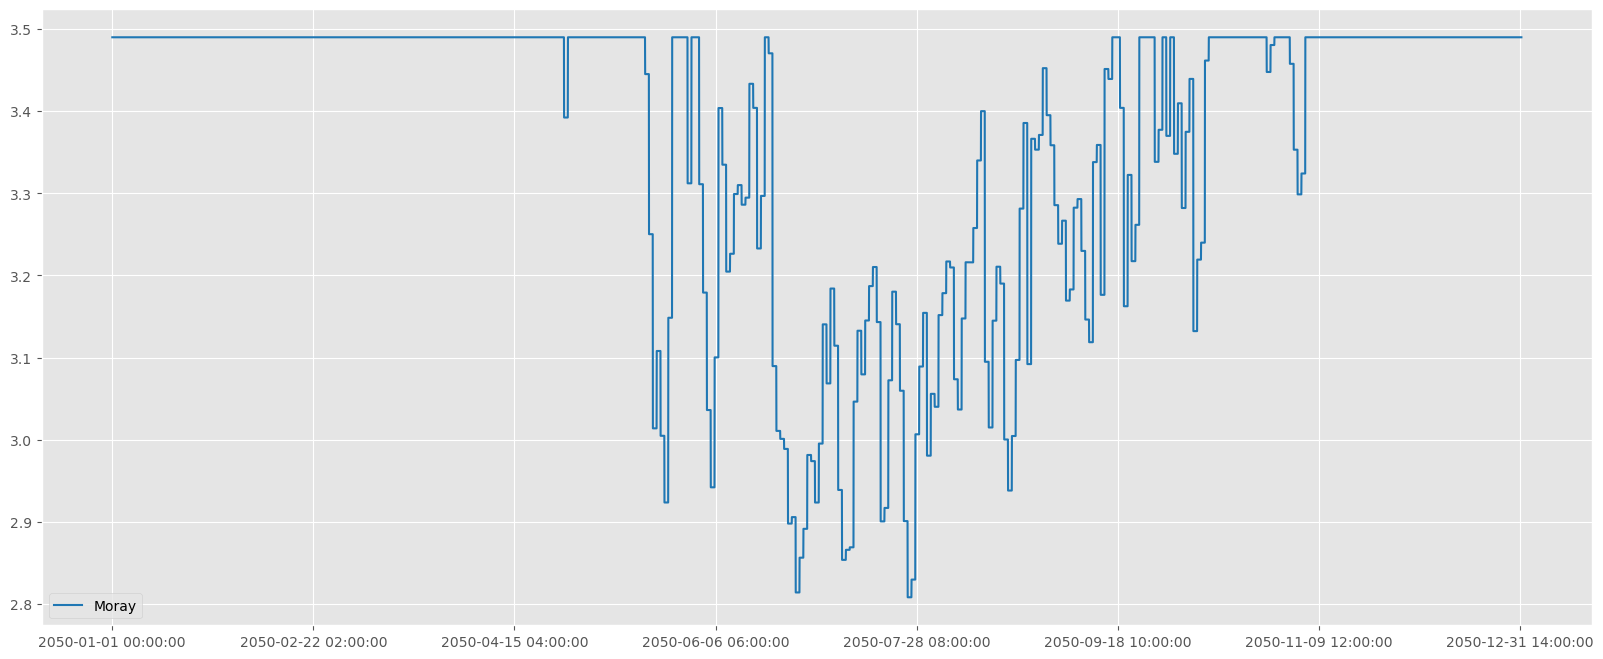

In [5]:
df_GSHP = copr.day_cop_for_year_LA('GSHP', 'very good', future_year=future_year, weather_year=weather_year)
df_GSHP_LA = df_GSHP[[LA]]

plt.style.use('ggplot')
df_GSHP_LA.plot(figsize=(20,8), cmap='tab20')

In [6]:
air_temp_daily = pd.read_csv('data/LA_UK/air_temp/average_day_air_temp_' + str(weather_year) + '.csv')
normalised_profiles = {'daytime': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat daytime HPs', usecols="B:I"),
                           'bi-modal': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat bimodal HPs', usecols="B:I"),
                           'continuous': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat continuous HPs', usecols="B:I")}
LA_heat_pattern_total = hd.LA_heat_pattern_totals(future_year, FES_year, FES_scenario)
FES_scaling = hd.FES_scaling_factor_calc(future_year, FES_year, FES_scenario)
hd.heat_demand_for_LA_half_hourly(LA, air_temp_daily, weather_year, future_year, FES_year, FES_scenario, FES_scaling, normalised_profiles, LA_heat_pattern_total)

,ASHP,GSHP,Gas boiler,BioLPG boiler,Biomass boiler,Community,DH,Electric resistive,Electric storage,Hybrid (ASHP + BioLPG boiler),Hybrid (ASHP + Hydrogen boiler),Hydrogen boiler,Oil boiler,Hybrid (ASHP + Electric resistive)
2050-01-01 00:00:00,5076.204377,6854.372488,0.0,348.807829,147.306622,1.351541,2221.549518,0.0,3232.536981,113.483326,32.751073,42.278966,0.0,2163.201911
2050-01-01 00:30:00,5160.376560,6978.673588,0.0,352.780688,148.984418,1.366935,2246.852573,0.0,3299.616204,114.775881,33.124102,42.760516,0.0,2187.840397
2050-01-01 01:00:00,5308.301339,7171.439401,0.0,367.281655,155.108388,1.423122,2339.208919,0.0,3387.500747,119.493717,34.485660,44.518177,0.0,2277.771062
2050-01-01 01:30:00,5409.713910,7305.348452,0.0,374.835472,158.298474,1.452391,2387.319012,0.0,3448.302502,121.951323,35.194921,45.433774,0.0,2324.617573
2050-01-01 02:00:00,5592.829823,7517.160499,0.0,397.736368,167.969856,1.541127,2533.174328,0.0,3523.452755,129.402044,37.345185,48.209590,0.0,2466.642090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-12-31 21:30:00,5418.263258,6488.375653,0.0,684.012008,288.868225,2.650371,4356.457687,0.0,2538.708600,222.540756,64.224841,82.909034,0.0,4242.038053
2050-12-31 22:00:00,4774.349430,5863.515787,0.0,550.572742,232.514881,2.133328,3506.585885,0.0,2400.353914,179.126789,51.695652,66.734873,0.0,3414.487602
2050-12-31 22:30:00,4144.504795,5256.287422,0.0,416.631981,175.949749,1.614342,2653.520075,0.0,2267.868063,135.549661,39.119376,50.499925,0.0,2583.827031
2050-12-31 23:00:00,3673.495570,4803.332769,0.0,315.159528,133.096455,1.221162,2007.244220,0.0,2169.346540,102.535977,29.591689,38.200458,0.0,1954.525207


In [7]:
filename = 'data/heat_demand_profiles/' + LA + '_' + FES_scenario + '_' + FES_year + '_' + str(weather_year) + '_' + str(future_year) + '.csv'
hd_df = pd.read_csv(filename, index_col=0)
hd_df.index = pd.to_datetime(hd_df.index)

<AxesSubplot: >

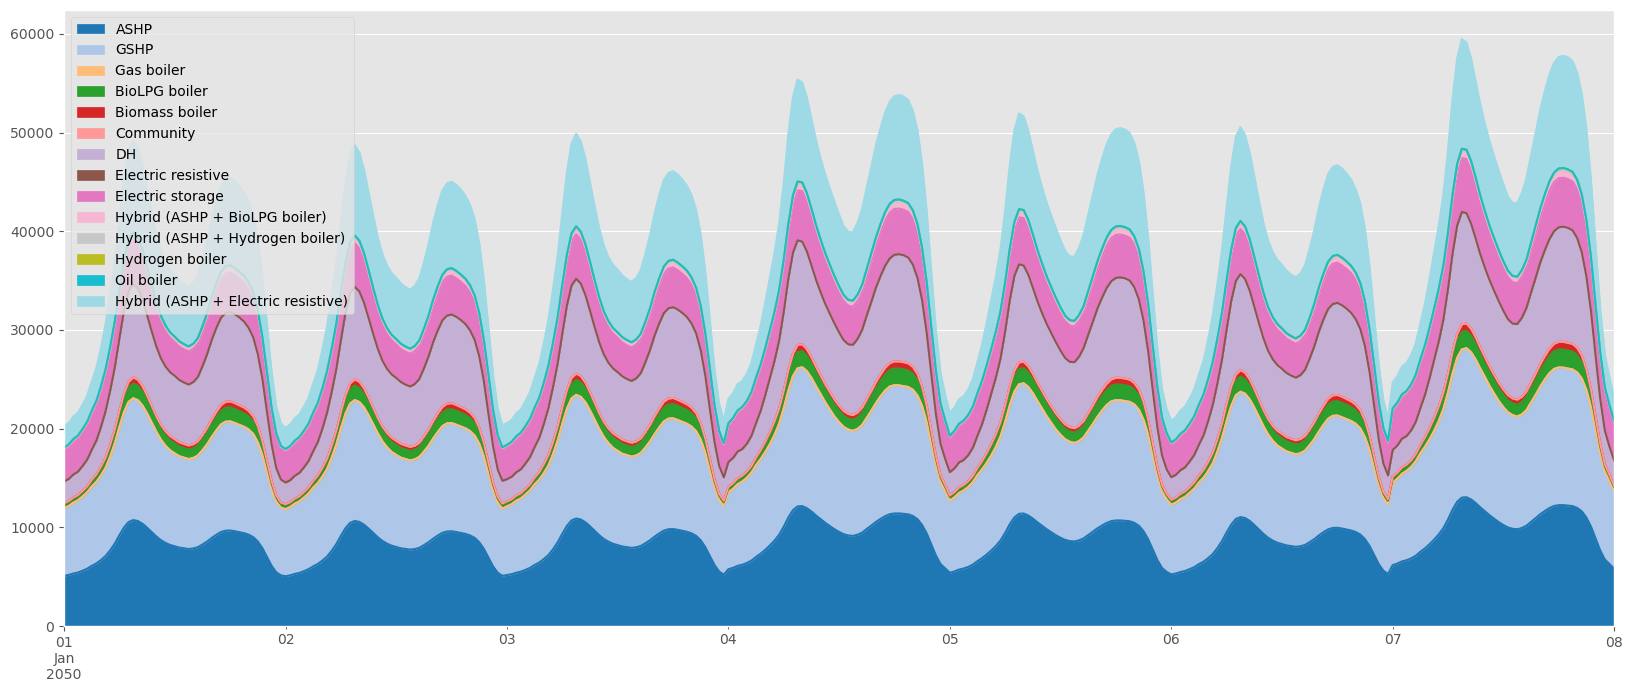

In [8]:
hd_df['2050-01-01 00:00:00': '2050-01-08 00:00:00'].plot.area(figsize=(20,8), cmap='tab20')

<AxesSubplot: >

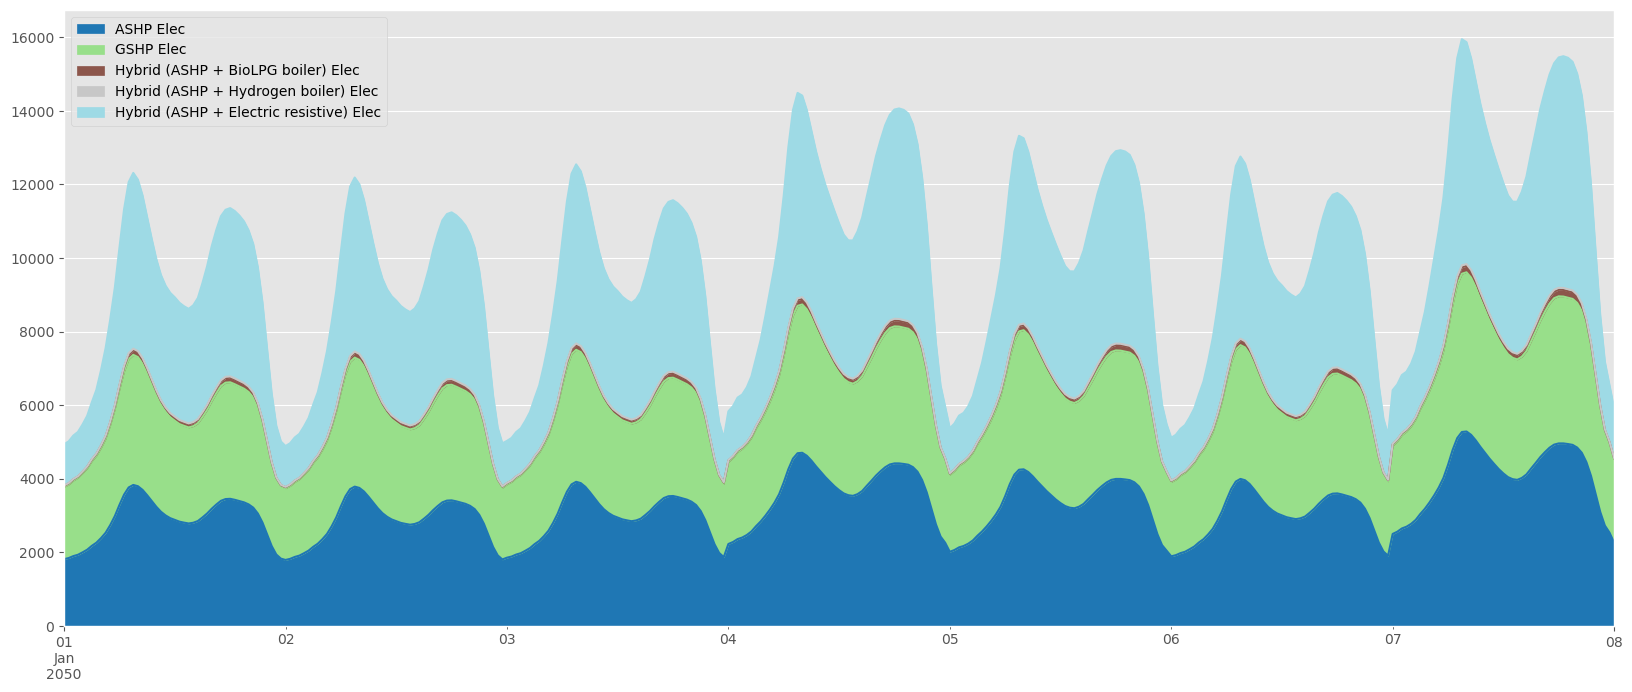

In [9]:
elec_hd_df = hd_df[['ASHP', 'GSHP', 'Hybrid (ASHP + BioLPG boiler)', 'Hybrid (ASHP + Hydrogen boiler)', 'Hybrid (ASHP + Electric resistive)']]
elec_hd_df['ASHP Elec'] = elec_hd_df['ASHP'] / df_ASHP_LA[LA].values
elec_hd_df['GSHP Elec'] = elec_hd_df['GSHP'] / df_GSHP_LA[LA].values
# assume 75% of electrical demand is met by ASHP for hybrids
elec_hd_df['Hybrid (ASHP + BioLPG boiler) Elec'] = 0.75 * elec_hd_df['Hybrid (ASHP + BioLPG boiler)'] / df_ASHP_LA[LA].values
elec_hd_df['Hybrid (ASHP + Hydrogen boiler) Elec'] = 0.75 * elec_hd_df['Hybrid (ASHP + Hydrogen boiler)'] / df_ASHP_LA[LA].values
elec_hd_df['Hybrid (ASHP + Electric resistive) Elec'] = 0.75 * elec_hd_df['Hybrid (ASHP + Electric resistive)'] / df_ASHP_LA[LA].values + 0.25 * elec_hd_df['Hybrid (ASHP + Electric resistive)']
elec_hd_df[['ASHP Elec', 'GSHP Elec', 'Hybrid (ASHP + BioLPG boiler) Elec', 'Hybrid (ASHP + Hydrogen boiler) Elec', 'Hybrid (ASHP + Electric resistive) Elec']]['2050-01-01 00:00:00': '2050-01-08 00:00:00'].plot.area(figsize=(20,8), cmap='tab20')

<AxesSubplot: >

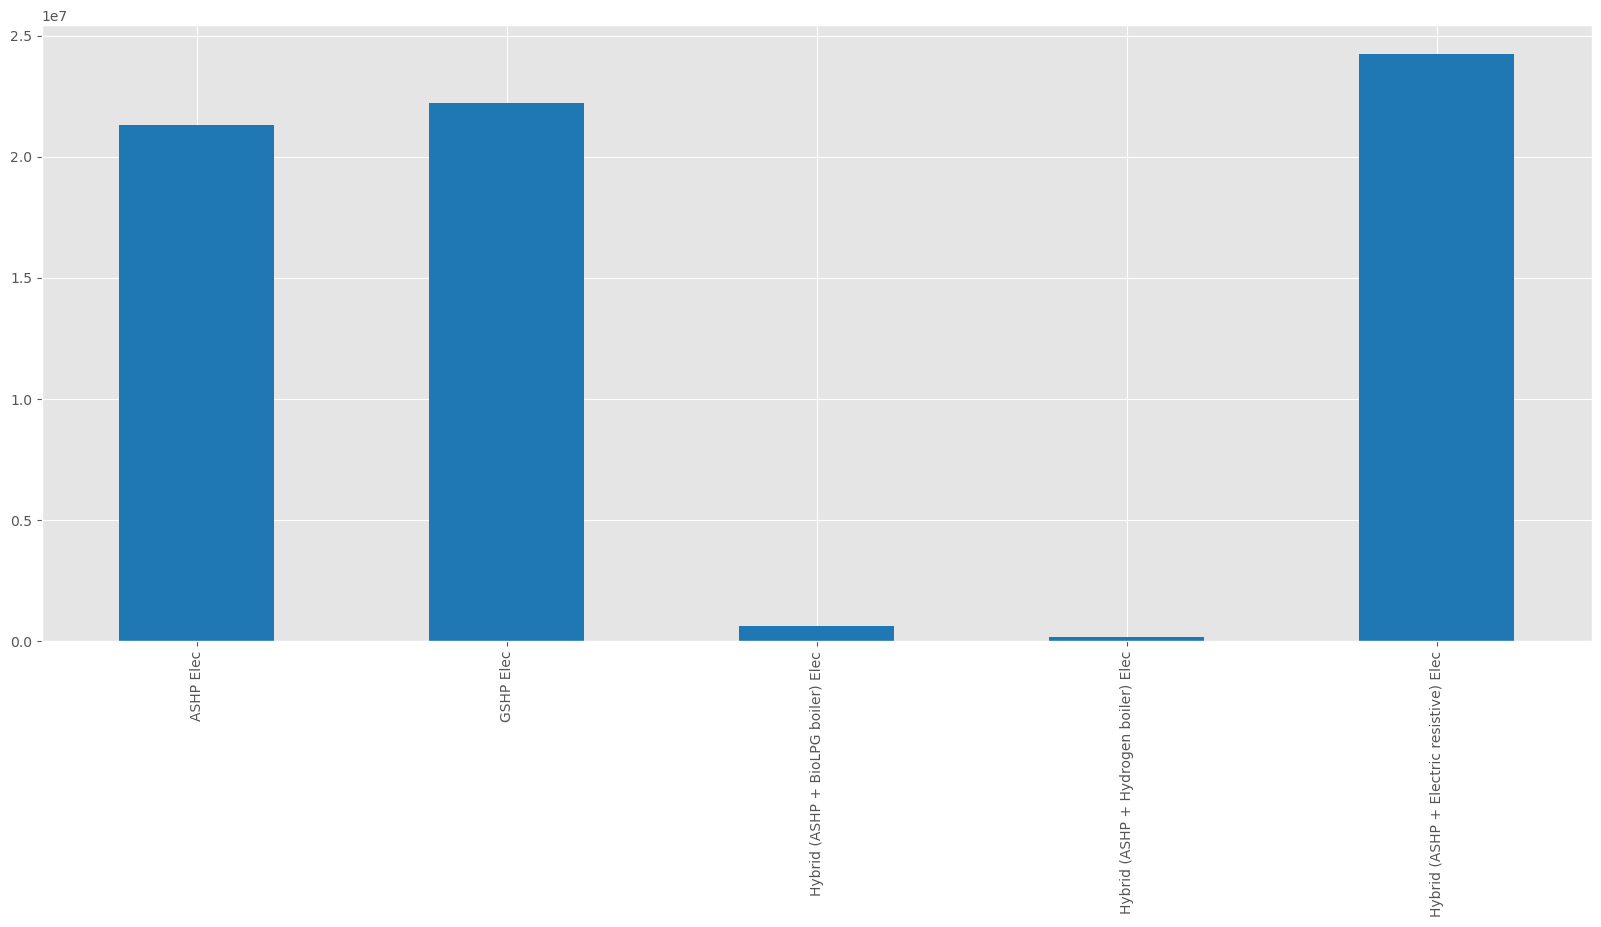

In [10]:
ed_df = elec_hd_df[['ASHP Elec', 'GSHP Elec', 'Hybrid (ASHP + BioLPG boiler) Elec', 'Hybrid (ASHP + Hydrogen boiler) Elec', 'Hybrid (ASHP + Electric resistive) Elec']]
ed_df.sum().plot.bar(figsize=(20,8), cmap='tab20')

In [11]:
# total in GWh
ed_df.sum().sum() / 1000000

68.59347986742854